In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("googleplaystore.csv")
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [2]:
data.shape

(10841, 13)

In [3]:
data.duplicated().value_counts()

False    10358
True       483
dtype: int64

In [4]:
# Eliminem els duplicats
data.drop_duplicates(keep='first', inplace=True)
data.shape

(10358, 13)

In [5]:
# Es reestableix l'índex ja que tenim un nombre diferent de files
data = data.reset_index().drop("index", axis=1).copy()

In [6]:
data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [7]:
data[data['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9990,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [8]:
data = data.drop(data.index[9990])

In [9]:
data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [10]:
#Comprovem el percentatge de nulls en cada variable
data.isnull().sum()/len(data)*100

App                0.000000
Category           0.000000
Rating            14.145023
Reviews            0.000000
Size               0.000000
Installs           0.000000
Type               0.009655
Price              0.000000
Content Rating     0.000000
Genres             0.000000
Last Updated       0.000000
Current Ver        0.077242
Android Ver        0.019311
dtype: float64

In [11]:
#Eliminem les files en les quals el Rating es Nan ja que no ens serveix pel nostre anàlisi
data = data.dropna(subset=["Rating", "Type", "Current Ver", "Android Ver"])
data.isnull().sum()/len(data)*100

App               0.0
Category          0.0
Rating            0.0
Reviews           0.0
Size              0.0
Installs          0.0
Type              0.0
Price             0.0
Content Rating    0.0
Genres            0.0
Last Updated      0.0
Current Ver       0.0
Android Ver       0.0
dtype: float64

In [12]:
data.shape

(8886, 13)

In [16]:
# Seleccionem les columnes que seran usades
columns = [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12]
data = data.iloc[:,columns].copy()

data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [40]:
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')
data['Rating'].dtype

dtype('float64')

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8886 entries, 0 to 10357
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8886 non-null   object 
 1   Category        8886 non-null   object 
 2   Rating          8886 non-null   float64
 3   Reviews         8886 non-null   object 
 4   Size            8886 non-null   object 
 5   Installs        8886 non-null   object 
 6   Type            8886 non-null   object 
 7   Content Rating  8886 non-null   object 
 8   Genres          8886 non-null   object 
 9   Last Updated    8886 non-null   object 
 10  Current Ver     8886 non-null   object 
 11  Android Ver     8886 non-null   object 
dtypes: float64(1), object(11)
memory usage: 902.5+ KB


In [45]:
# Eliminem els duplicats
data.drop_duplicates("App", inplace=True)

In [47]:
data.shape

(8190, 12)

In [104]:
data['Reviews'] = pd.to_numeric(data.Reviews,errors='coerce').fillna(0).astype(np.int64)

In [107]:
data.Installs = [int(obs.replace("+", "").replace(",", "")) for obs in data.Installs]

In [108]:
data['Size'] = data['Size'].str.replace('M','000000',regex=True)
data['Size'] = data['Size'].str.replace('k','000',regex=True)
data['Size'] = data['Size'].replace('[^\d.]', '', regex = True)
data['Size'] = pd.to_numeric(data.Size).fillna(0).astype(np.int64)

Un cop fet el processament i la neteja de les dades, es resoldran diferents qüestions sobre aquest conjunt de dades.

# Top 10 Apps amb major rating

In [55]:
data.sort_values(by=['Rating'],ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7856,The Divine Feminine App: the DF App,LIFESTYLE,5.0,8,6.7M,"1,000+",Free,Everyone,Lifestyle,"May 16, 2016",0.0.4,4.1 and up
6341,Jabbla BT,TOOLS,5.0,3,55k,100+,Free,Everyone,Tools,"October 6, 2014",1.0,4.2 and up
8707,EB Scanner,PRODUCTIVITY,5.0,9,25M,50+,Free,Everyone,Productivity,"February 11, 2018",1.7.8,4.0.3 and up
8713,UP EB Bill Payment & Details,SOCIAL,5.0,3,2.4M,50+,Free,Teen,Social,"July 11, 2018",2.0,4.0 and up
8737,EB Cash Collections,BUSINESS,5.0,1,4.3M,5+,Free,Everyone,Business,"July 31, 2018",1.10,4.4 and up
6801,CF Townsville,HEALTH_AND_FITNESS,5.0,4,14M,100+,Free,Everyone,Health & Fitness,"July 9, 2018",4.2.2,4.1 and up
5026,meStudying: AP English Lit,FAMILY,5.0,1,655k,10+,Paid,Everyone,Education,"August 31, 2013",1.3,2.0.1 and up
6789,CF,FINANCE,5.0,2,2.0M,100+,Free,Everyone,Finance,"March 30, 2016",1.1,4.0 and up
8764,EC Calgary,FAMILY,5.0,6,8.1M,100+,Free,Teen,Education,"June 26, 2018",3.8.0,4.1 and up
8765,Victoria EC,TOOLS,5.0,5,3.8M,500+,Free,Everyone,Tools,"March 30, 2018",1.283.0037,2.3.3 and up


#  Apps amb el màxim rating

In [58]:
data[data.Rating >= 5.0]

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
296,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,37M,"1,000+",Free,Everyone,Comics,"June 26, 2018",2.0,4.0.3 and up
546,American Girls Mobile Numbers,DATING,5.0,5,4.4M,"1,000+",Free,Mature 17+,Dating,"July 17, 2018",3.0,4.0.3 and up
549,Awake Dating,DATING,5.0,2,70M,100+,Free,Mature 17+,Dating,"July 24, 2018",2.2.9,4.4 and up
567,Spine- The dating app,DATING,5.0,5,9.3M,500+,Free,Teen,Dating,"July 14, 2018",4.0,4.0.3 and up
570,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6,5.0M,100+,Free,Mature 17+,Dating,"August 1, 2018",8.2,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...
10239,Mad Dash Fo' Cash,GAME,5.0,14,16M,100+,Free,Everyone,Arcade,"June 19, 2017",2.5a,4.1 and up
10260,GKPB FP Online Church,LIFESTYLE,5.0,32,7.9M,"1,000+",Free,Everyone,Lifestyle,"December 31, 2017",0.7.1,4.4 and up
10293,Monster Ride Pro,GAME,5.0,1,24M,10+,Free,Everyone,Racing,"March 5, 2018",2.0,2.3 and up
10337,Fr. Daoud Lamei,FAMILY,5.0,22,8.6M,"1,000+",Free,Teen,Education,"June 27, 2018",3.8.0,4.1 and up


#  Top 10 Apps amb major nombre de ressenyes

In [105]:
data.sort_values(by=['Reviews'],ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2246,Facebook,SOCIAL,4.1,78158306,Varies with device,"1,000,000,000+",Free,Teen,Social,"August 3, 2018",Varies with device,Varies with device
303,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
2247,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,Teen,Social,"July 31, 2018",Varies with device,Varies with device
302,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,"1,000,000,000+",Free,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
1463,Clash of Clans,GAME,4.6,44891723,98M,"100,000,000+",Free,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up
3558,Clean Master- Space Cleaner & Antivirus,TOOLS,4.7,42916526,Varies with device,"500,000,000+",Free,Everyone,Tools,"August 3, 2018",Varies with device,Varies with device
1447,Subway Surfers,GAME,4.5,27722264,76M,"1,000,000,000+",Free,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
3239,YouTube,VIDEO_PLAYERS,4.3,25655305,Varies with device,"1,000,000,000+",Free,Teen,Video Players & Editors,"August 2, 2018",Varies with device,Varies with device
7067,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,Varies with device,"500,000,000+",Free,Everyone,Tools,"August 4, 2018",4.6.6,Varies with device
1453,Clash Royale,GAME,4.6,23133508,97M,"100,000,000+",Free,Everyone 10+,Strategy,"June 27, 2018",2.3.2,4.1 and up


# Top 10 Apps amb major nombre d'instal·lacions

In [109]:
data.sort_values(by=['Installs'],ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2731,Google Street View,TRAVEL_AND_LOCAL,4.2,2129689,0,1000000000,Free,Everyone,Travel & Local,"August 6, 2018",Varies with device,Varies with device
2256,Google+,SOCIAL,4.2,4831125,0,1000000000,Free,Teen,Social,"July 26, 2018",Varies with device,Varies with device
3310,Google News,NEWS_AND_MAGAZINES,3.9,877635,13000000,1000000000,Free,Teen,News & Magazines,"August 1, 2018",5.2.0,4.4 and up
755,Google Play Games,ENTERTAINMENT,4.3,7165362,0,1000000000,Free,Teen,Entertainment,"July 16, 2018",Varies with device,Varies with device
2818,Google,TOOLS,4.4,8033493,0,1000000000,Free,Everyone,Tools,"August 3, 2018",Varies with device,Varies with device
302,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,0,1000000000,Free,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
303,WhatsApp Messenger,COMMUNICATION,4.4,69119316,0,1000000000,Free,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
305,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,0,1000000000,Free,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
3035,Google Drive,PRODUCTIVITY,4.4,2731171,0,1000000000,Free,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
307,Gmail,COMMUNICATION,4.3,4604324,0,1000000000,Free,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device


# Apps amb major nombre d'instal·lacions ordenades per Rating

In [116]:
data[data.Installs >= 1000000000].sort_values(by=['Rating'],ascending=False)

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2247,Instagram,SOCIAL,4.5,66577313,0,1000000000,Free,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2459,Google Photos,PHOTOGRAPHY,4.5,10858556,0,1000000000,Free,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device
1447,Subway Surfers,GAME,4.5,27722264,76000000,1000000000,Free,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
303,WhatsApp Messenger,COMMUNICATION,4.4,69119316,0,1000000000,Free,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
2818,Google,TOOLS,4.4,8033493,0,1000000000,Free,Everyone,Tools,"August 3, 2018",Varies with device,Varies with device
3035,Google Drive,PRODUCTIVITY,4.4,2731171,0,1000000000,Free,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
305,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,0,1000000000,Free,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
307,Gmail,COMMUNICATION,4.3,4604324,0,1000000000,Free,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
755,Google Play Games,ENTERTAINMENT,4.3,7165362,0,1000000000,Free,Teen,Entertainment,"July 16, 2018",Varies with device,Varies with device
3239,YouTube,VIDEO_PLAYERS,4.3,25655305,0,1000000000,Free,Teen,Video Players & Editors,"August 2, 2018",Varies with device,Varies with device


# Top 10 Apps amb la mida més gran

In [115]:
data.sort_values(by=['Size'],ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4971,Ultimate Tennis,SPORTS,4.3,183004,100000000,10000000,Free,Everyone,Sports,"July 19, 2018",2.29.3118,4.0.3 and up
5074,The Walking Dead: Our World,GAME,4.0,22435,100000000,1000000,Free,Teen,Action,"August 1, 2018",1.1.0.3,5.0 and up
2041,Navi Radiography Pro,MEDICAL,4.7,11,100000000,500,Paid,Everyone,Medical,"January 14, 2018",1.2.0,4.0.3 and up
1578,Mini Golf King - Multiplayer Game,GAME,4.5,531458,100000000,5000000,Free,Everyone,Sports,"July 20, 2018",3.04.1,4.0.3 and up
1546,Hungry Shark Evolution,GAME,4.5,6074334,100000000,100000000,Free,Teen,Arcade,"July 25, 2018",6.0.0,4.1 and up
5405,Miami crime simulator,GAME,4.0,254518,100000000,10000000,Free,Mature 17+,Action,"July 9, 2018",2.0,4.0 and up
8689,Stickman Legends: Shadow Wars,GAME,4.4,38419,100000000,1000000,Paid,Everyone 10+,Action,"August 3, 2018",2.3.24,4.1 and up
6935,SimCity BuildIt,FAMILY,4.5,4218587,100000000,50000000,Free,Everyone 10+,Simulation,"June 19, 2018",1.23.3.75024,4.0 and up
8366,Draft Simulator for FUT 18,SPORTS,4.6,162933,100000000,5000000,Free,Everyone,Sports,"May 11, 2018",25.7,4.1 and up
1366,Talking Babsy Baby: Baby Games,LIFESTYLE,4.0,140995,100000000,10000000,Free,Everyone,Lifestyle;Pretend Play,"July 16, 2018",9.0,4.0 and up


# Distribució de Rating

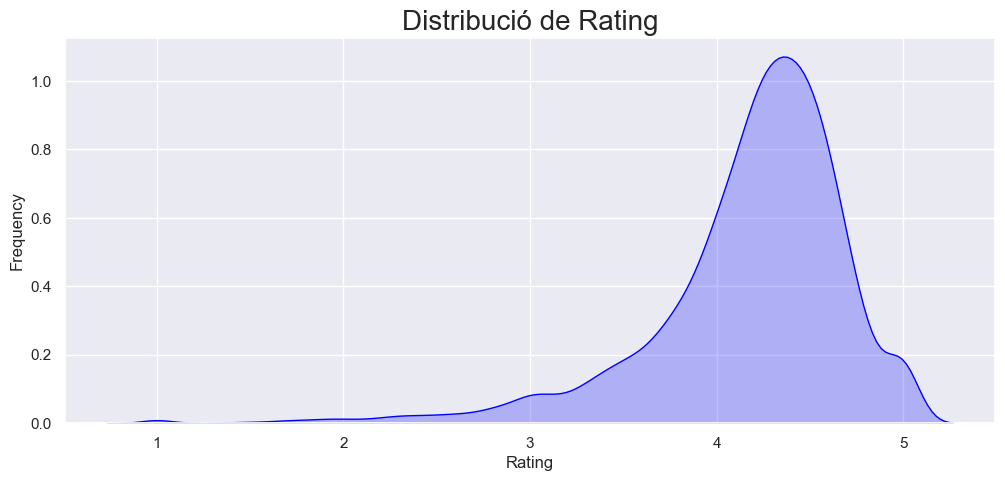

In [124]:
plt.figure(figsize=(12,5))
plt.xlabel("Rating")
plt.ylabel("Frequency")
graph = sns.kdeplot(data.Rating, color="Blue", shade = True)
plt.title('Distribució de Rating',size = 20);

#  Major nombre d' Apps per gènere

In [84]:
generes = data['Genres'].value_counts().head(10)
generes

Tools              716
Entertainment      471
Education          429
Finance            302
Productivity       301
Lifestyle          300
Personalization    296
Action             292
Medical            290
Sports             266
Name: Genres, dtype: int64

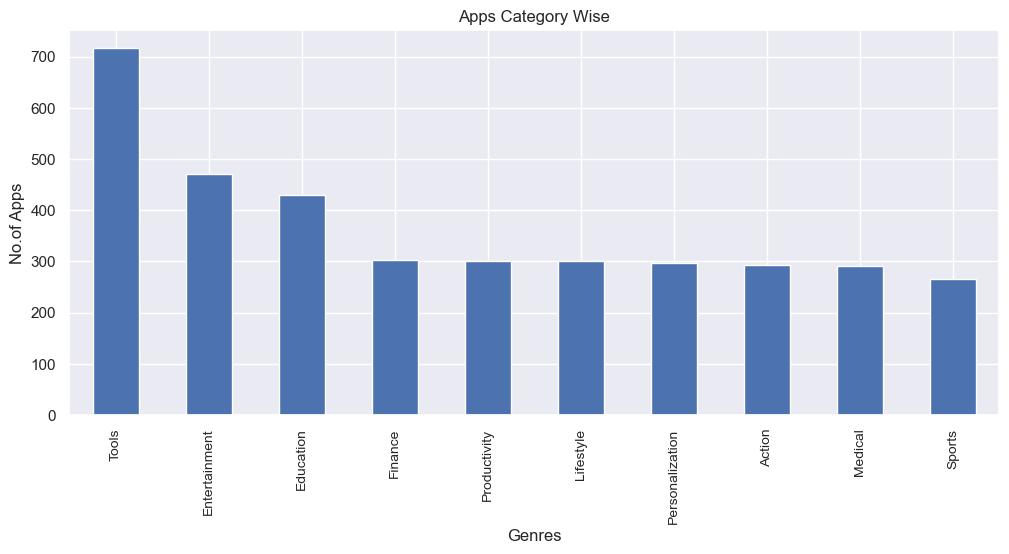

In [85]:
plt.figure(figsize=(12,5))
plt.title("Apps per Genres ")
plt.ylabel('Nombre de Apps')
plt.xlabel('Genres')
plt.xticks(rotation=60,fontsize=10)
data['Genres'].value_counts().head(10).plot(kind='bar')
plt.show()

# Major nombre d'aplicacions per categoria

In [86]:
categories = data['Category'].value_counts().head(10)
categories

FAMILY             1607
GAME                912
TOOLS               717
FINANCE             302
PRODUCTIVITY        301
LIFESTYLE           301
PERSONALIZATION     296
MEDICAL             290
BUSINESS            263
PHOTOGRAPHY         263
Name: Category, dtype: int64

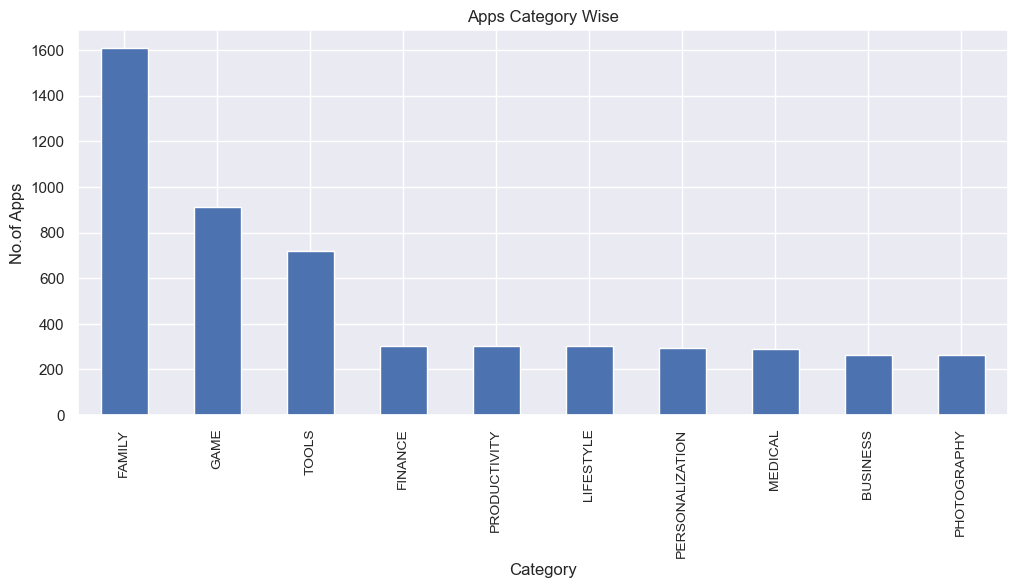

In [87]:
plt.figure(figsize=(12,5))
plt.title("Apps per Categoria")
plt.ylabel('Nombre de Apps')
plt.xlabel('Category')
plt.xticks(rotation=60,fontsize=10)
data['Category'].value_counts().head(10).plot(kind='bar')
plt.show()

# Nombre d'aplicacions segons l'edat

<AxesSubplot:title={'center':'No. of Apps rated in each Age Group'}, ylabel='Content Rating'>

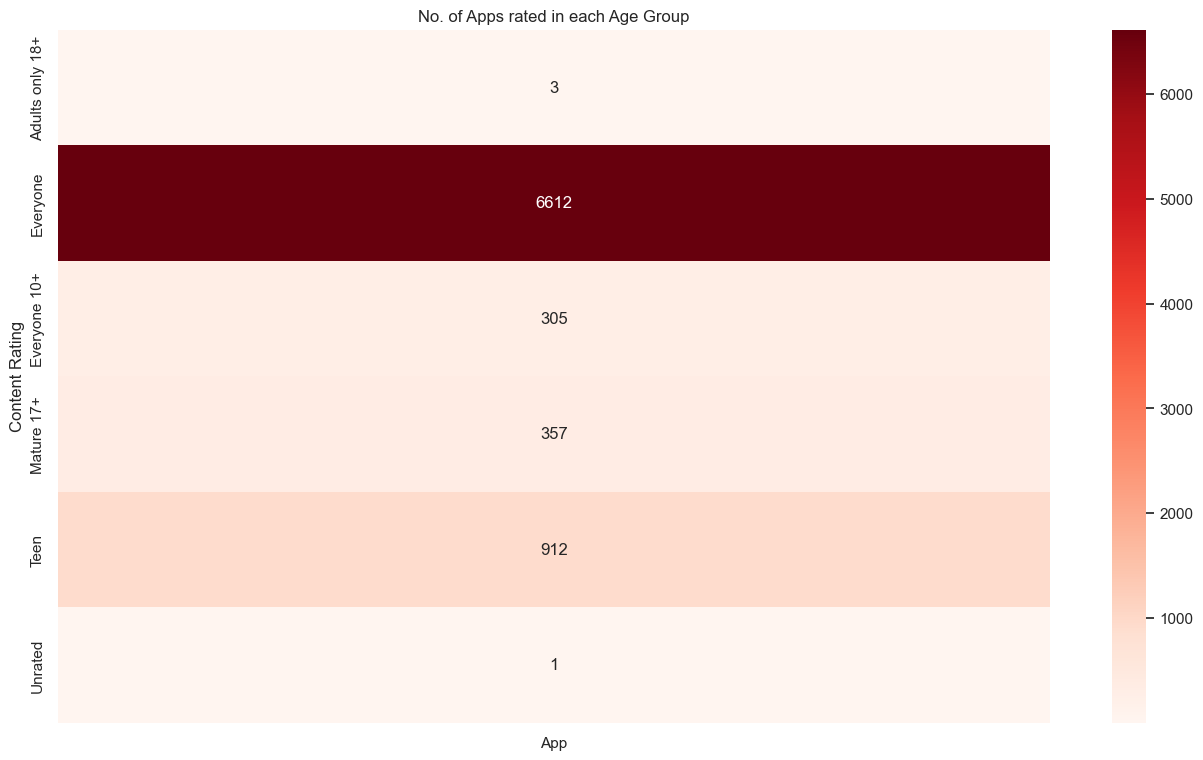

In [88]:
plt.title("Nombre de Apps per grup d'edat")
sns.heatmap(data.groupby('Content Rating')[['App']].count(),fmt="d", annot=True, cmap='Reds')

# Apps distribuïdes segons la versió d'Android

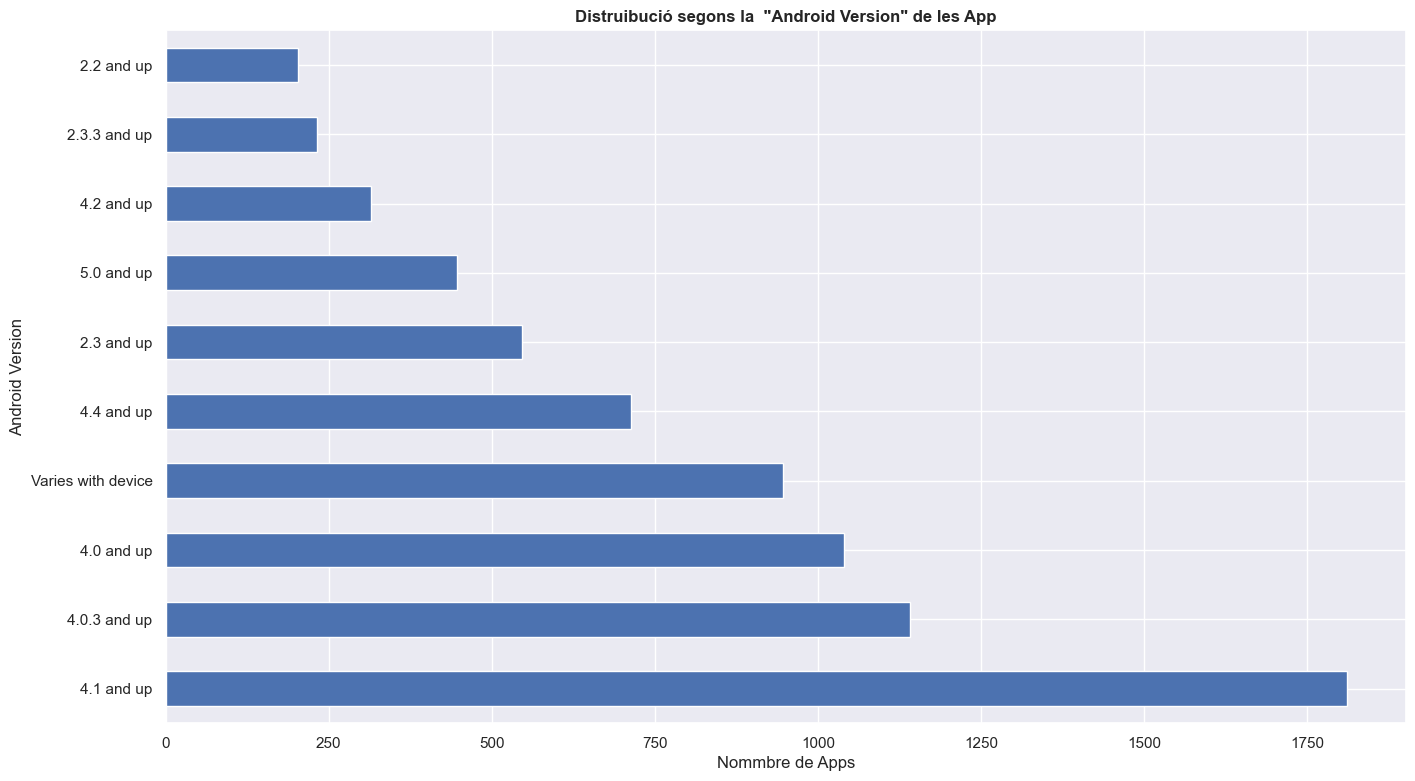

In [121]:
plt.title('Distruibució segons la "Android Version" de les App',fontweight=600)
plt.ylabel('Android Version')
plt.xlabel('Nommbre de Apps')
data['Android Ver'].value_counts().head(10).plot(kind='barh')
plt.show()

#  Apps distribuïdes segons la versió actual

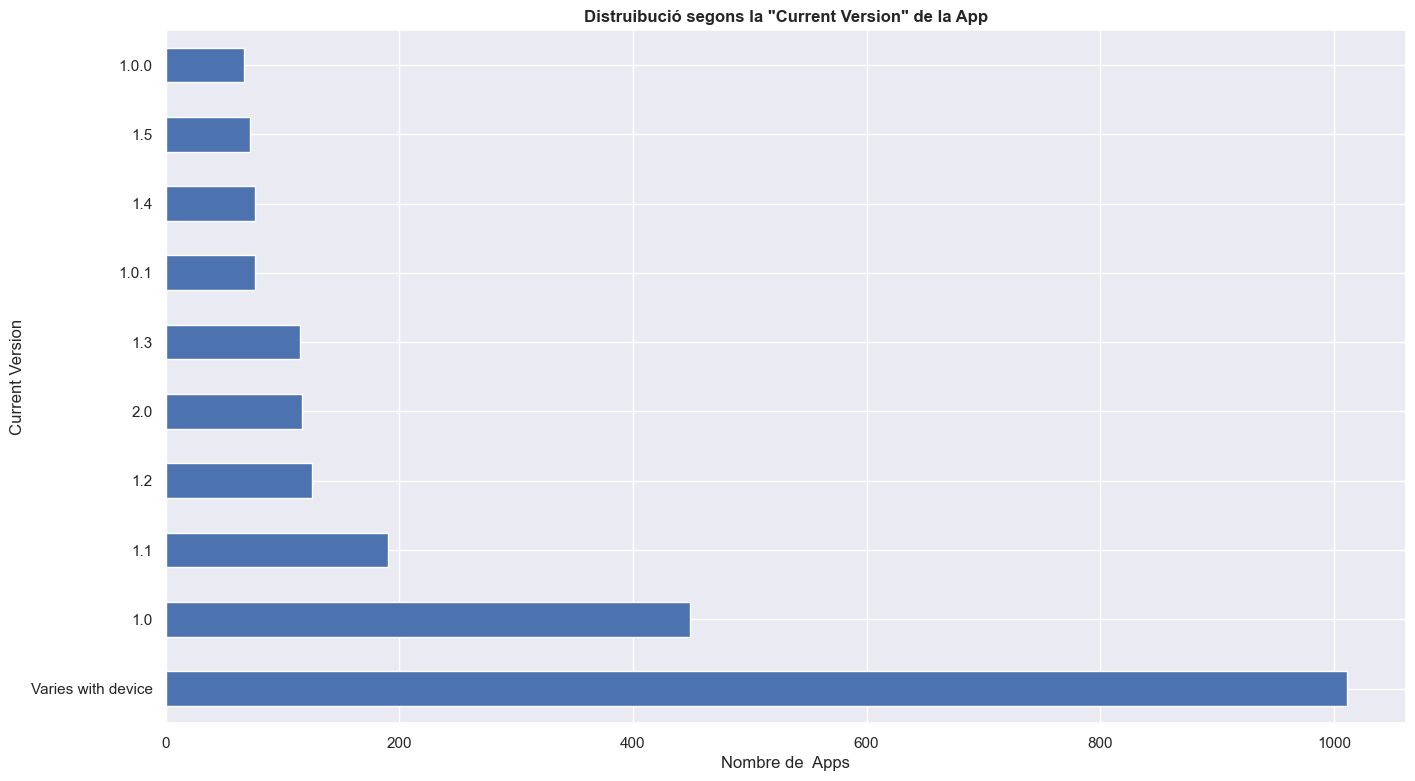

In [125]:
plt.title('Distruibució segons la "Current Version" de la App',fontweight=600)
plt.ylabel('Current Version')
plt.xlabel('Nombre de  Apps')
data['Current Ver'].value_counts().head(10).plot(kind='barh')
plt.show()

# Distribució de Apps segons Paid/Free

In [96]:
free_or_paid=data.groupby('Type')[['App']].count()
free_or_paid

,App
Type,
Free,7588
Paid,602


Text(0.5, 1.0, 'Distribution of Apps based on Paid/Free')

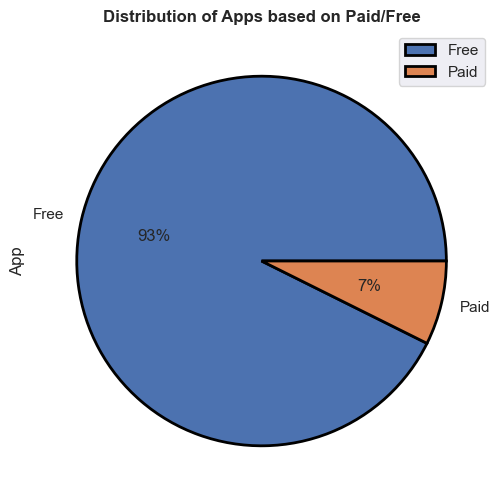

In [103]:
free_or_paid.plot.pie(subplots=True, figsize=(12, 6), wedgeprops={"edgecolor":"0",'linewidth': 2}, autopct='%1.0f%%')
plt.title('Distribució de Apps segons Paid/Free',fontweight=600)

In [ ]:
data.to_csv('cleaned_apps.csv')